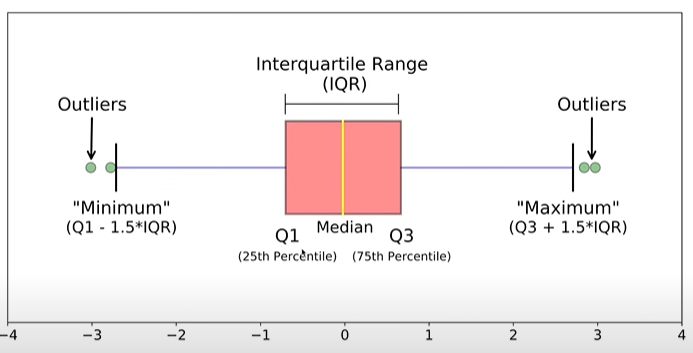

In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


In [10]:
df_DA_US['salary_year_avg'].sample(10)

567800     90000.0
577649     80080.0
109228    114727.5
157652    115000.0
575231     59500.0
205992    112000.0
696638     72500.0
92556      80000.0
303939    117500.0
607943    108415.5
Name: salary_year_avg, dtype: float64

<Axes: >

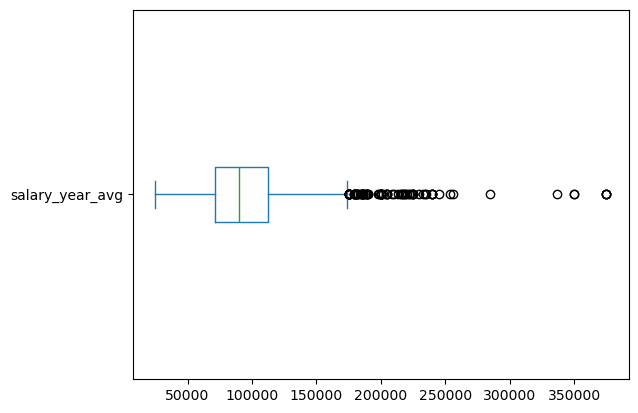

In [15]:
df_DA_US['salary_year_avg'].plot(kind='box', vert= False) # using Pandas

{'whiskers': [<matplotlib.lines.Line2D at 0x17a977f4250>,
 'caps': [<matplotlib.lines.Line2D at 0x17a977f5610>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a977d3ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x17a977f6590>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a977f6ed0>],
 'means': []}

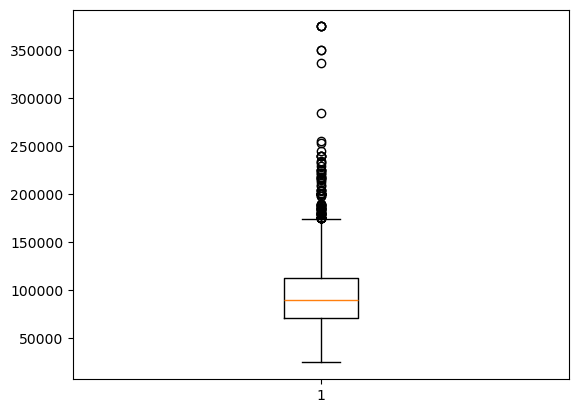

In [14]:
plt.boxplot(df_DA_US['salary_year_avg']) # using matplotlib

{'whiskers': [<matplotlib.lines.Line2D at 0x17a984439d0>,
 'caps': [<matplotlib.lines.Line2D at 0x17a98454dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a98443250>,
 'medians': [<matplotlib.lines.Line2D at 0x17a98455f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x17a98456810>,
 'means': []}

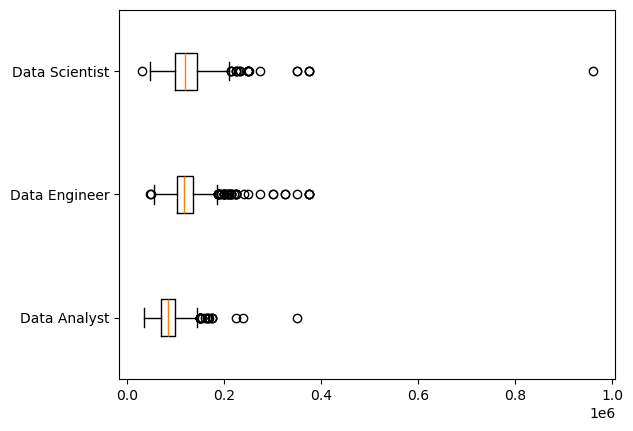

In [24]:
# plt.boxplot(job_list, labels, vert= False)

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

# for job_list (list of series values of salary for respective titles) we can use a list comprehension

job_list = [df_US[df_US['job_title'] == job_title]['salary_year_avg'] for job_title in job_titles]

# now we can plot the box plot

plt.boxplot(job_list, labels= job_titles, vert= False)

In [23]:
job_list[0]

1681      111175.0
3237      120000.0
3807      117500.0
5182       85000.0
5839       67500.0
            ...   
775088     76500.0
776063     82500.0
776762    118050.0
777764    105515.0
781263     75000.0
Name: salary_year_avg, Length: 1118, dtype: float64

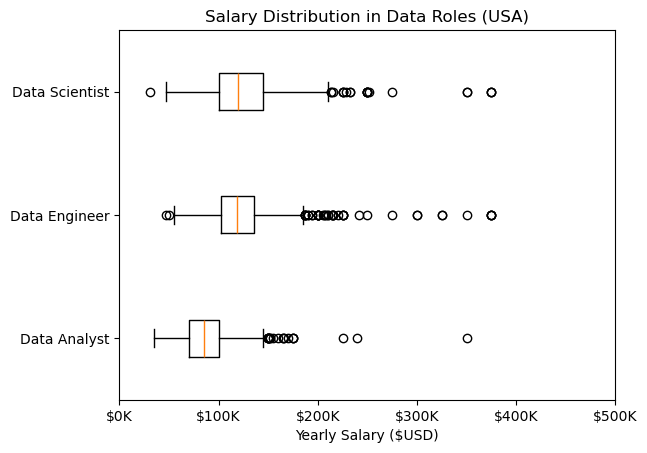

In [30]:
# collating the above codes:

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels= job_titles, vert= False)

plt.title('Salary Distribution in Data Roles (USA)')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 500000)
plt.show()

This box plot illustrates the salary distribution across three different data roles—Data Scientist, Data Engineer, and Data Analyst—in the USA.

### Insights:
1. **Median Salaries**:
   - **Data Scientist**: The median salary is the highest among the three roles, located around $150K.
   - **Data Engineer**: The median salary is slightly lower, around $120K.
   - **Data Analyst**: The median salary is the lowest, around $80K.

2. **Interquartile Range (IQR)**:
   - **Data Scientist**: Has a wider IQR compared to Data Engineers and Data Analysts, indicating a broader range of salaries within the middle 50% of the data.
   - **Data Engineer**: Has a moderate IQR, indicating that while the salaries are more clustered, they still have a broad range.
   - **Data Analyst**: The IQR is the smallest, indicating that salaries for this role are more closely clustered around the median.

3. **Outliers**:
   - **Data Scientist**: There are several outliers, with some reaching up to $500K or more, reflecting the high earning potential in this role.
   - **Data Engineer**: Also shows outliers, but they are less extreme than those for Data Scientists, with a few reaching up to $400K.
   - **Data Analyst**: Has fewer outliers, with the highest outliers reaching around $200K.

4. **Overall Spread**:
   - **Data Scientist**: Shows the widest spread of salaries, from below $100K to well over $400K, indicating significant variability in salary depending on factors like experience, location, and company.
   - **Data Engineer**: Has a narrower spread compared to Data Scientists but still ranges broadly from just below $100K to over $300K.
   - **Data Analyst**: Displays the narrowest spread, with most salaries falling between $50K and $150K.

### Conclusions:
- **Higher Variability in Senior Roles**: Data Scientists, typically seen as a more senior and specialized role, show greater variability and higher earning potential, especially at the upper end.
- **Relative Stability for Data Analysts**: Data Analysts have more stable and predictable salary ranges, but with less potential for exceptionally high earnings compared to the other roles.
- **Data Engineers as a Middle Ground**: Data Engineers fall in between, with competitive salaries and some potential for higher earnings, but not as extreme as Data Scientists. 

This plot can help guide decisions for individuals considering these roles or for employers looking to understand salary expectations within the data field.